<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2024/2025

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 3: *Data Preparation & Dimensionality Reduction***

###**Tenggat Waktu: 23 Februari 2025 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab1_1806205773_Abdurrafi Arief.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 23 Februari 2025, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam (pembulatan ke atas). Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.
9. Mahasiswa wajib mencantumkan semua sumber yang menjadi referensi jawaban, termasuk GPT.

## **Pernyataan Integritas**

In [1]:
# Isi dengan data diri Anda
NAMA = "Yoshelin Yamala Vijnana"
KELAS = "C"
NPM = "2206826702"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["ChatGPT, Bing, Google"]

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Yoshelin Yamala Vijnana dari kelas C dengan NPM 2206826702, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Yoshelin Yamala Vijnana)


# Data Preprocessing

Data prepropessing merupakan proses membersihkan dan mentransformasi pada data mentah sebelum digunakan untuk menganalisis data atau untuk menge-train suatu machine learning. Fungsi dari data preprocessing adalah agar data-data yang akan dipakai sudah dipastikan berkualitas agar analisis atau machine learning yang dihasilkan memiliki hasil yang baik.


## Deskripsi Dataset

Dataset ini berisikan data mengenai kualitas suatu wine, dengan beberapa karakteristik dari wine tersebut. Dataset ini diambil dari : https://archive.ics.uci.edu/dataset/186/wine+quality. Berikut merupakan metadata dari setiap atributnya :

**Fixed Acidity:** Most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

**Volatile Acidity:** The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

**Citric Acid:** Dound in small quantities, citric acid can add 'freshness' and flavor to wines.

**Residual Sugar:** The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

**Chlorides:** The amount of salt in the wine.

**Free Sulfur Oxide:** The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

**Total Sulfur Oxide:** Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

**Density:** The density of water is close to that of water depending on the percent alcohol and sugar content.

**pH:** Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

**Sulphates:** A wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

**Alcohol:** The percent alcohol content of the wine.

**Quality:** Output variable (based on sensory data, score between 0 and 10).

In [212]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler

In [213]:
# Import dataset
df = pd.read_csv('winequality-red.csv')

In [214]:
# KODE INI JANGAN DIGANTI
def manipulate_dataframe(df, remove_frac=0.2, duplicate_frac=0.2, random_state=None):
    np.random.seed(random_state)

    df_masked = df.copy()
    for col in df.columns:
        mask = np.random.rand(df.shape[0]) < remove_frac
        df_masked.loc[mask, col] = np.nan

    num_rows_to_duplicate = int(duplicate_frac * df.shape[0])
    rows_to_duplicate = df_masked.sample(n=num_rows_to_duplicate, random_state=random_state)
    df_augmented = pd.concat([df_masked, rows_to_duplicate], ignore_index=True)

    return df_augmented

In [215]:
# KODE INI JANGAN DIGANTI
df = manipulate_dataframe(df, remove_frac=0.05, duplicate_frac=0.2, random_state=int(NPM))
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,NaN,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1913,10.0,0.38,0.38,1.6,0.169,27.0,NaN,0.99914,3.15,0.65,8.5,5.0
1914,7.9,0.35,0.21,1.9,0.073,46.0,102.0,0.99640,3.27,0.58,9.5,5.0
1915,6.6,0.39,0.49,1.7,0.070,23.0,149.0,0.99220,3.12,NaN,11.5,6.0
1916,7.6,0.79,0.21,2.3,0.087,21.0,68.0,0.99550,3.12,0.44,9.2,5.0


In [216]:
total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

df.head()

Jumlah data: 1918
Jumlah atribut: 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,NaN,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1810 non-null   float64
 1   volatile acidity      1822 non-null   float64
 2   citric acid           1828 non-null   float64
 3   residual sugar        1830 non-null   float64
 4   chlorides             1822 non-null   float64
 5   free sulfur dioxide   1814 non-null   float64
 6   total sulfur dioxide  1808 non-null   float64
 7   density               1825 non-null   float64
 8   pH                    1824 non-null   float64
 9   sulphates             1828 non-null   float64
 10  alcohol               1820 non-null   float64
 11  quality               1805 non-null   float64
dtypes: float64(12)
memory usage: 179.9 KB


In [143]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1810.000000,1822.000000,1828.000000,1830.000000,1822.000000,1814.000000,1808.000000,1825.000000,1824.000000,1828.000000,1820.000000,1805.000000
mean,8.302707,0.527580,0.269781,2.553087,0.087023,15.974917,46.840708,0.996719,3.312736,0.658260,10.434945,5.634903
std,1.743191,0.179088,0.195038,1.459050,0.046899,10.511862,33.095990,0.001933,0.156529,0.173957,1.081345,0.809588
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995550,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.635000,0.420000,2.600000,0.090000,22.000000,63.000000,0.997860,3.410000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

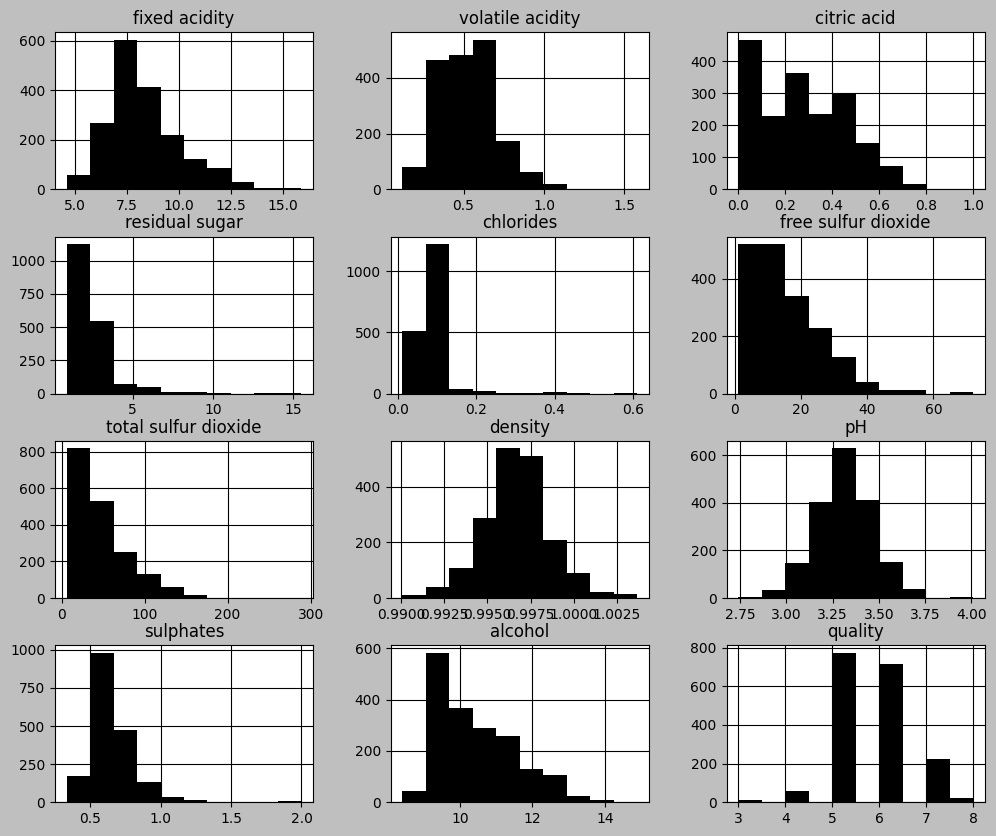

In [191]:
df.hist(figsize=(12,10))

Visualisasi di atas merupakan karakteristik dari data yang dipunya yang informasi tersebut dapat digunakan dalam preprocessing. Prerocessing yang akan dilakukan adalah : Menangani duplikasi data, outlier, dan missing value.

Setelah mengetahui deskripsi dataset yang akan digunakan, kita akan memulai proses *data pre-processing*. Pada pengerjaan lab ini, pre-processing yang akan kita lakukan adalah: penanganan duplikasi data, penanganan outlier, dan penanganan missing value.

## Penanganan Duplikasi Data

**Soal 1** : Cek apakah terdapat data duplikat, dan berapa jumlahnya

In [203]:
# 1 Jawab di sini

# Mengecek jumlah data duplikat dan menampilkannya
jumlah_duplikat = df.duplicated().sum()
if jumlah_duplikat > 0:
    print(f"Jumlah data duplikat: {jumlah_duplikat}")
else: # Jika tidak ada duplikat
    print("Tidak ada data yang duplikat dalam dataset.")


Jumlah data duplikat: 393


**Soal 2** : Tangani data duplikat jika ada

In [219]:
# Memfilter/membersihkan data dari duplikat
df_cleaned = df.drop_duplicates()

# Mengecek jumlah baris sebelum dan sesudah penghapusan duplikat
print("Duplikat berhasil ditangani.")
print(f"Sebelum penghapusan: {df.shape[0]} baris data")
print(f"Setelah penghapusan: {df_cleaned.shape[0]} baris data")
print(f"Total {df.shape[0] - df_cleaned.shape[0]} baris duplikat telah dihilangkan.")

# Mengecek jumlah missing values
print("\nJumlah Missing Value per Kolom setelah penghapusan duplikat:")
print(df_cleaned.isnull().sum())
df_cleaned.reset_index(drop=True, inplace=True)

# Menampilkan dataset
display(df_cleaned)


Duplikat berhasil ditangani.
Sebelum penghapusan: 1918 baris data
Setelah penghapusan: 1525 baris data
Total 393 baris duplikat telah dihilangkan.

Jumlah Missing Value per Kolom setelah penghapusan duplikat:
fixed acidity           89
volatile acidity        81
citric acid             74
residual sugar          73
chlorides               84
free sulfur dioxide     83
total sulfur dioxide    86
density                 80
pH                      82
sulphates               77
alcohol                 80
quality                 90
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,NaN,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1520,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1521,5.9,0.550,0.10,NaN,0.062,39.0,51.0,NaN,3.52,0.76,11.2,6.0
1522,6.3,0.510,0.13,2.3,0.076,NaN,40.0,0.99574,3.42,0.75,11.0,NaN
1523,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


**Soal 3** : Mengapa data duplikat perlu ditangani?

Data duplikat perlu ditangani dalam PCA karena dapat mengganggu proses ekstraksi principal components, yang bertujuan untuk menangkap arah variansi terbesar dalam dataset. Kemudian, berdasarkan materi yang telah disampaikan minggu ini, reduksi dimensi dilakukan dengan menghitung matriks kovarian, lalu mencari nilai eigen dan vektor eigen dari matriks tersebut. Jadi, apabila terdapat data duplikat, maka variansi yang dihitung akan terdistorsi, menyebabkan principal components tidak merepresentasikan distribusi data yang sebenarnya. Selain itu, data yang berulang tidak menambah informasi baru tetapi justru meningkatkan ukuran matriks kovarian dan memperlambat proses SVD. Dengan menghapus duplikasi, hasilnya reduksi dimensi akan lebih akurat serta efisien.

## Penanganan Outlier

Outlier merupakan data yang abnormal dari data-data yang lain. Outlier ini memiliki nilai yang sangat kecil atau sangat besar dibandingkan data-data yang lain.

### Deteksi Outlier

**Soal 4** : Salah satu cara untuk mendeteksi outlier adalah dengan menggunakan boxplot, gunakan boxplot untuk mendeteksi outlier pada semua atribut yang ada!

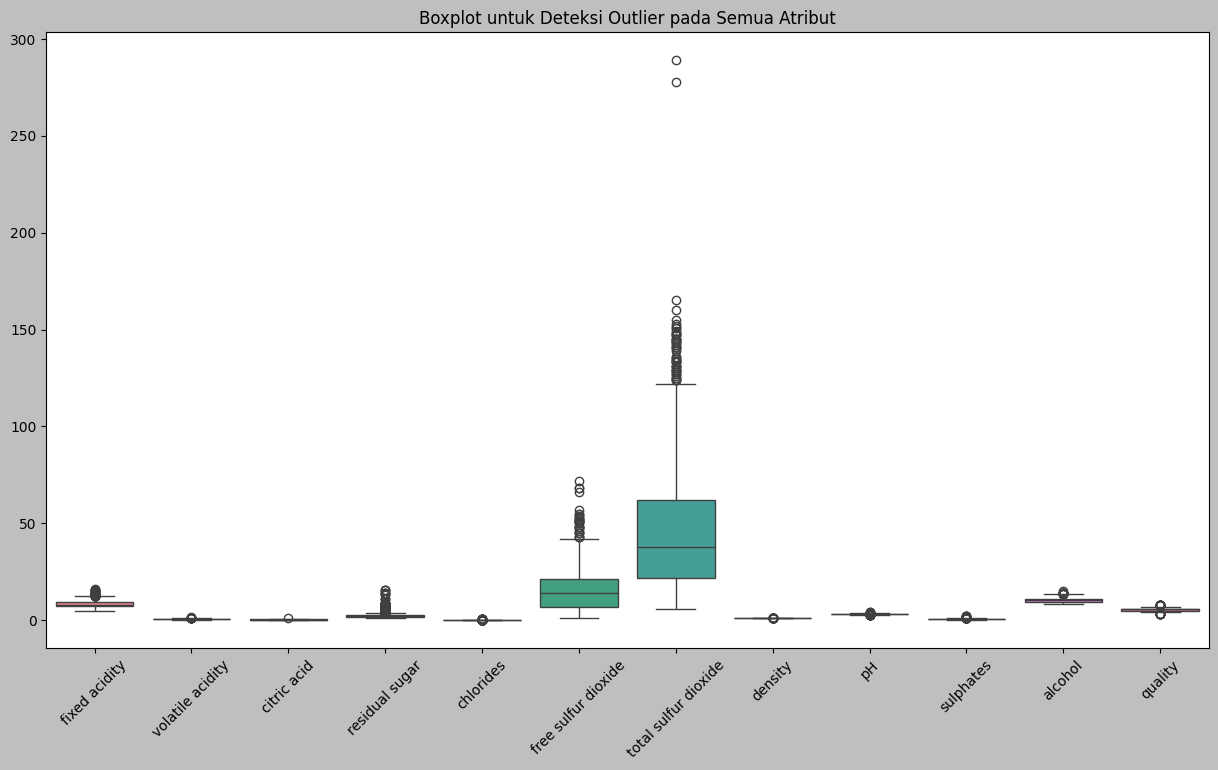

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat boxplot untuk mendeteksi outlier pada semua atribut numerik
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_wine)
plt.xticks(rotation=45)
plt.title("Boxplot untuk Deteksi Outlier pada Semua Atribut")
plt.show()


**Penjelasan No. 4:** 

Dari hasil visualisasi menggunakan boxplot, dapat disimpulkan bahwa terdapat beberapa atribut dalam dataset yang memiliki outlier. Outlier ini terlihat sebagai titik-titik yang berada jauh dari rentang interkuartil (IQR), berikut penjelasan dari setiap atributnya:

Pada Volatile acidity, ada beberapa nilai ekstrem yang lebih tinggi dari batas atas.
Pada Chlorides, terlihat ada beberapa titik yang jauh di atas rentang normal.
Pada Free sulfur dioxide, terdapat beberapa nilai tinggi yang menyimpang.
Pada Total sulfur dioxide, atribut ini memiliki banyak outlier dengan nilai yang jauh lebih besar dari kebanyakan data lainnya.
Pada Sulphates, ada titik-titik yang menunjukkan keberadaan nilai yang jauh lebih besar.
Pada Alcohol, beberapa nilai tertinggi pada atribut ini juga tergolong outlier.

**Soal 5** : Ada berapa banyak outlier pada setiap atribut (menggunakan metode IQR)?

In [195]:
# Soal 5

import pandas as pd
total_outlier = {} # Menyimpan jumlah outlier

for column in df_wine.columns:
    Q1 = df_wine[column].quantile(0.25)
    Q3 = df_wine[column].quantile(0.75)  
    IQR = Q3 - Q1  
    
    # Menentukan upper dan lower bound
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    
    # Menemukan outliers dan menampilkan hasil dalam dataframe
    outliers = df_wine[(df_wine[column] < batas_bawah) | (df_wine[column] > batas_atas)]
    total_outlier[column] = len(outliers)
outlier_df = pd.DataFrame(list(total_outlier.items()), columns=["Atribut", "Jumlah Outlier"])
display(outlier_df)


,Atribut,Jumlah Outlier
0,fixed acidity,49
1,volatile acidity,19
2,citric acid,1
3,residual sugar,155
4,chlorides,112
5,free sulfur dioxide,30
6,total sulfur dioxide,55
7,density,45
8,pH,35
9,sulphates,59


### Menangani Outlier

Penanganan data outlier dapat dilakukan dengan cara-cara berikut :
- Jika outlier tidak terlalu banyak, maka dapat didrop datanya
- Jika model machine learning yang digunakan tidak sensitif oleh outlier, maka outlier tidak perlu ditangani
- Jika outlier yang didapatkan dari IQR merupakan data yang wajar berdasarkan domain data, maka outlier tidak perlu ditangani (kecuali outlier tersebut membuat machine learning anda lebih buruk)
- Jika outlier disebabkan oleh alat observasi yang rusak, maka data outlier tersebut dapat diganti dengan data yang baru dengan alat observasi yang sudah diperbaiki.
- Anda dapat menggunakan log transformation untuk distribusi yang skewed
- Anda dapat mengganti nilai outlier dengan mean atau median
- Anda dapat mengganti nilai outlier dengan upper bound atau lower bound
- Anda dapat menggunakan domain knowledge untuk mengetahui apa nilai yang hilang tersebut
- Jika nilai yang hilang dikarenakan oleh kesalahan alat observasi, maka alat observasi tersebut dapat diperbaiki dan dilakukan observasi ulang.

**Soal 6** : Tangani outlier dan jelaskan mengapa anda menggunakan cara tersebut untuk menangani outlier-nya!

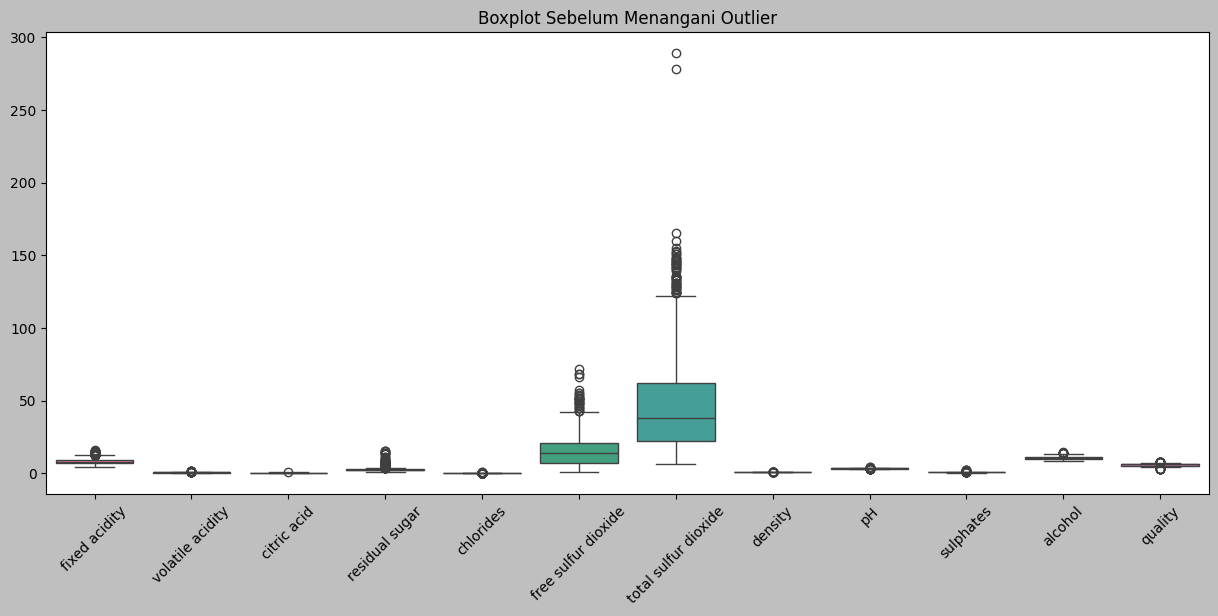

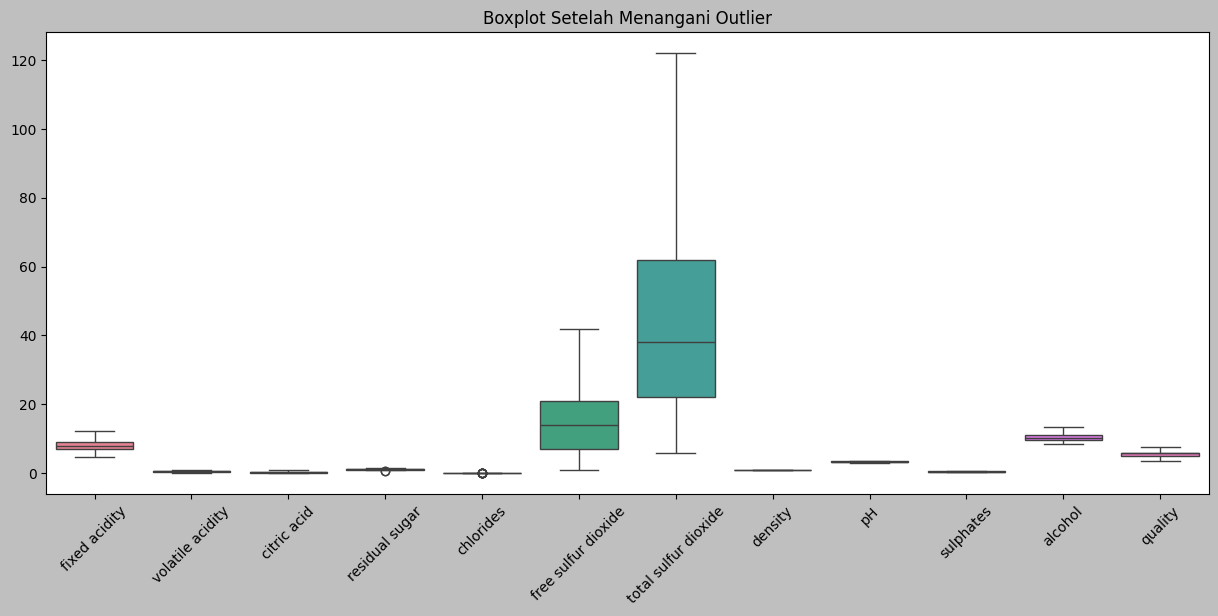

Data setelah menangani outlier:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00        1.064711   0.073250   
1            7.8              0.88         0.00        1.280934   0.093490   
2            7.8              0.76         0.04        1.193922   0.088011   
3           11.2              0.28         0.56        1.064711   0.072321   
4            7.4              0.70         0.00        1.064711   0.073250   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51   0.444686   
1                 25.0                  67.0   0.9968  3.20   0.518794   
2                 15.0                  54.0   0.9970  3.26   0.500775   
3                 17.0                  60.0   0.9980  3.16   0.457425   
4                 11.0                  34.0   0.9978  3.51   0.444686   

   alcohol  quality  
0      9.4      5.0  
1      9.8

In [196]:
# 6 Jawab di sini

# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_wine = pd.read_csv("winequality-red.csv")  # Sesuaikan dengan path file jika berbeda

# Mengecek outlier menggunakan boxplot sebelum penanganan
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_wine)
plt.xticks(rotation=45)
plt.title("Boxplot Sebelum Menangani Outlier")
plt.show()

# Menentukan batas IQR untuk setiap kolom numerik
for column in df_wine.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_wine[column].quantile(0.25)
    Q3 = df_wine[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Winsorization
    df_wine[column] = np.where(df_wine[column] < lower_bound, lower_bound, df_wine[column])
    df_wine[column] = np.where(df_wine[column] > upper_bound, upper_bound, df_wine[column])

# Log Transformation untuk fitur skewed
skewed_features = ['residual sugar', 'chlorides', 'sulphates']
df_wine[skewed_features] = df_wine[skewed_features].apply(lambda x: np.log1p(x))

# Mengecek outlie
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_wine)
plt.xticks(rotation=45)
plt.title("Boxplot Setelah Menangani Outlier")
plt.show()

# Menampilkan dataset
print("Data setelah menangani outlier:")
print(df_wine.head())


Dalam menangani outlier pada dataset, metode yang saya gunakan adalah Winsorization dan Log Transformation. Winsorization sendiri saya lakukan dengan mengganti nilai outlier yang berada di luar batas IQR dengan upper bound atau lower bound. Saya memilih metode ini karena outlier yang terdeteksi cukup banyak, sehingga menghapus data akan menyebabkan kehilangan informasi yang cukup signifikan menurut saya. Selain itu, beberapa atribut seperti residual sugar, chlorides, dan sulphates memiliki distribusi yang skewed, sehingga diterapkan Log Transformation untuk menstabilkan variansi. Drop data outlier tidak saya lakukan karena jumlahnya cukup banyak untuk dihapus dan dataset masih bisa diperbaiki tanpa kehilangan informasi.

## Penanganan Missing Value

Missing value merupakan data yang tidak ada. Missing value perlu ditangani karena banyak model machine learning yang mengharuskan atribut-atribut tidak kosong dan juga data yang tidak ada dapat membuat analisis data lebih sulit dilakukan.

Terdapat beberapa cara untuk menangani missing value, berikut merupakan caranya :    
- Menge-drop datanya, hal ini dilakukan jika missing value tidak terlalu banyak.
- Mengisi data yang hilang, untuk data numerik dapat menggunakan median atau mean, mean digunakan untuk distribusi normal, median digunakan untuk distribusi skewed, untuk data kategorikal dapat menggunakan modus.

**Soal 7** : Tangani missing value dan jelaskan mengapa anda menggunakan cara tersebut untuk menangani missing value!

In [197]:
# 7 Jawab di sini

import pandas as pd
from sklearn.impute import KNNImputer

# Load dataset
df_wine = pd.read_csv("winequality-red.csv")  # Sesuaikan dengan path file jika berbeda

# Mengecek apakah terdapat missing value
missing_values = df_wine.isnull().sum()
print("Jumlah Missing Value per Kolom sebelum penanganan:")
print(missing_values)

# Conditional apakah ada missing value
if missing_values.sum() == 0:
    print("\nTidak ada missing value dalam dataset, tidak perlu dilakukan tindakan.")
else:
    for column in df_wine.select_dtypes(include=['float64', 'int64']).columns:
        if df_wine[column].isnull().sum() > 0:
            if df_wine[column].skew() > 1:  # Jika distribusi skewed, pakai median
                df_wine[column].fillna(df_wine[column].median(), inplace=True)
            else:  # Jika distribusi normal, pakai mean
                df_wine[column].fillna(df_wine[column].mean(), inplace=True)
    if df_wine.isnull().sum().sum() > 0:
        imputer = KNNImputer(n_neighbors=5)
        df_wine.iloc[:, :] = imputer.fit_transform(df_wine)
    print("\nMissing value telah diatasi menggunakan mean/median atau KNN Imputation.")


Jumlah Missing Value per Kolom sebelum penanganan:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Tidak ada missing value dalam dataset, tidak perlu dilakukan tindakan.


Walaupun missing values tidak terdeteksi, metode yang saya gunakan untuk menangani missing value adalah imputasi dengan mean/ median (tergantung pada distribusi data). Saya juga menggunakan KNN Imputation jika masih terdapat missing values setelahnya. Mean saya gunakan untuk data yang distribusinya normal, sedangkan median saya gunakan untuk data yang yang skewed agar tidak terpengaruh oleh outlier. Jika setelah imputasi masih ada missing values, KNN imputer akan digunakan untuk mengisi value berdasarkan pola terdekat dalam dataset, sehingga hasilnya lebih akurat dibanding sekadar mengganti dengan mean atau median. Pendekatan ini saya pilih dan pertimbangkan, karena menurut saya lebih efektif dalam mempertahankan karakteristik data tanpa kehilangan informasi penting/ signifikan.

# Dimensionality Reduction with Principal Component Analysis (PCA)

Pada analisis data dan *machine learning*, terdapat tahapan *dimensionality reduction*, yang sesuai namanya, mengacu pada teknik untuk mengurangi dimensi data namun berusaha untuk **memaksimalkan** informasi yang dapat dipertahankan.

Teknik dimensionality reduction terbagi menjadi dua kategori besar:
1. Feature Selection: mencari sekelompok fitur-fitur yang paling relevan untuk prediksi.
2. Feature Extraction: melakukan pemetaan suatu atribut menjadi atribut lain untuk mengurangi dimensi. Contohnya:
    * Principal Component Analysis (PCA)
    * Singular Value Decomposition (SVD)
    * Linear Discriminant Analysis (LDA)

## Principal Component Analysis (PCA)

PCA nerupakan salah satu teknik *dimensionality reduction* yang dilakukan untuk mentransformasikan data **numerik** dengan dimensi tinggi ke dimensi yang lebih rendah (mengurangi kompleksitas fitur). Cara kerjanya adalah mengindentifikasi vektor-vektor ortogonal yang disebut sebagai *principal components* yang mencoba menangkap variansi secara maksimal. *Principal components* pertama menangkap variansi terbesar pada data, *principal components* kedua menangkap variansi maximum yang *orthogonal* dari *principal components* pertama, dan seterusnya. Variansi data dapat ditangkap secara sempurna ketika jumlah *principal components* = jumlah dimensi. **Namun,** pada sebagian besar kasus, terutama data dengan dimensi yang sangat besar, variansi data dapat ditangkap secara cukup menggunakan jumlah *principal components* yang relatif kecil. (Baca selengkapnya pada PPT PCA yang terdapat di scele).

## Tahapan PCA dengan library sklearn

In [205]:
from sklearn.decomposition import PCA

df = pd.read_csv('winequality-red.csv')

X = df.drop(columns=['quality'])
y = df['quality']

# Scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [206]:
X_pca.shape

(1599, 11)

In [207]:
# explained variants
explained_variants = pca.explained_variance_ratio_
explained_variants

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.05996439, 0.05307193, 0.03845061, 0.0313311 , 0.01648483,
       0.00541439])

## Tahapan PCA tanpa library sklearn (manual)

In [208]:
X_manual = df.drop(columns=['quality'])
y_manual = df['quality']

# Scaling data
scaler = StandardScaler()
scaler.fit(X_manual)

scaled_data = scaler.transform(X_manual)

# Covariance Matrix
features = scaled_data.T
cov_matrix = np.cov(features)

# Eigen decomposition
values, vectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(values)[::-1]

values = values[sorted_indices]
vectors = vectors[:, sorted_indices]

explained_variances = []

for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))

print(np.sum(explained_variances))
print(explained_variances)

1.0
[np.float64(0.2817393127881728), np.float64(0.17508269905476787), np.float64(0.14095849897952176), np.float64(0.1102938664162113), np.float64(0.08720837012236168), np.float64(0.059964387715400885), np.float64(0.05307192901751537), np.float64(0.03845060905981648), np.float64(0.03133110152897777), np.float64(0.016484833324355044), np.float64(0.005414391992899029)]


Perhatikan bahwa nilai *explained variance* menggunakan library sklearn ataupun menggunakan PCA secara manual sama saja.

In [209]:
# Hitung cumulative explained variance ratio
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
explained_variance_ratio_cumulative

array([0.28173931, 0.45682201, 0.59778051, 0.70807438, 0.79528275,
       0.85524714, 0.90831906, 0.94676967, 0.97810077, 0.99458561,
       1.        ])

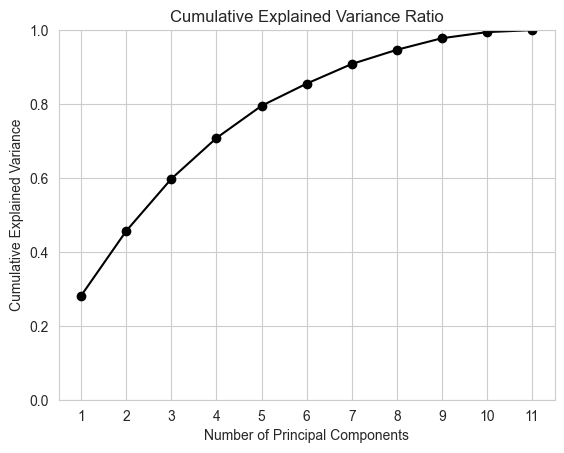

In [210]:
# Buat plot cumulative explained variance ratio
plt.plot(range(1, 12), explained_variance_ratio_cumulative, marker='o', linestyle='-')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.title('Cumulative Explained Variance Ratio')
plt.xticks(range(1, 12))
plt.ylim(0, 1)
plt.grid(True)
plt.show()

Dari plot di atas, terlihat bahwa 94% varians sudah dapat dijelaskan oleh 8 atribut (dari 11 atribut) saja menggunakan PCA. Selanjutnya mari kita visualisasikan data sebelum dan sesudah dilakukan PCA.

In [173]:
# Melakukan invers PCA n atribut (transformasi dari PCA ke fitur awal)
def inverse_pca(pca_data, pca, remove_n):
    transformed = pca_data.copy()
    transformed[:, -remove_n:] = 0
    return pca.inverse_transform(transformed)

LL = inverse_pca(X_pca, pca, 3)

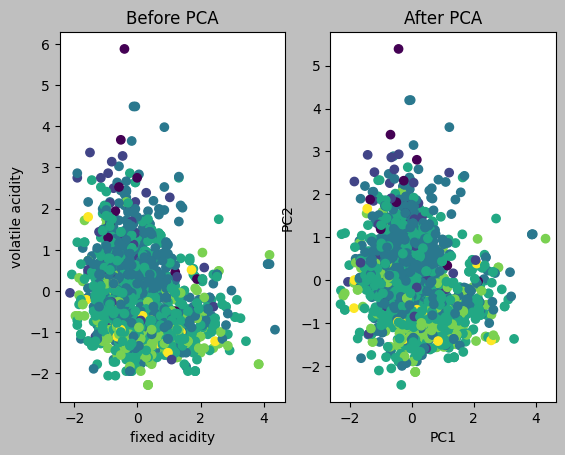

In [174]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=y, cmap='viridis')
axes[0].set_xlabel(X_manual.columns[0])
axes[0].set_ylabel(X_manual.columns[1])
axes[0].set_title('Before PCA')
axes[1].scatter(x=LL[:,0], y= LL[:,1],c=y, cmap='viridis')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

Berdasarkan visualisasi di atas, kita bisa melihat bahwa plot data sebelum dan sesudah PCA mirip. Di kiri adalah plot dari dua fitur `x1` dan `x2` di dataset asli sedangkan di kanan adalah plot hasil transformasi PCA. Hal ini karena kita dapat memaksimalisasi nilai explained variance terutama pada Principal Component 1 dan 2.

Kita dapat melihat bahwa perbandingan visualisasi data menggunakan atribut asli dengan visualisasi menggunakan PC1 (Principal Component 1) dan PC2 (Principal Component 2) menunjukkan visualisasi scatter plot yang cukup mirip. Hal ini karena PC1 dan PC2 "menangkap" variasi terbesar dari dataset

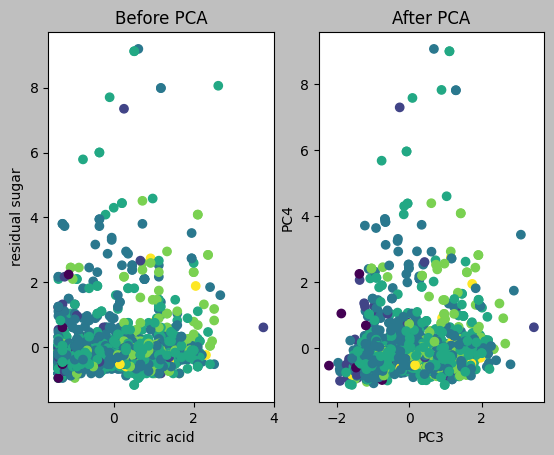

In [175]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(x=scaled_data[:,2], y=scaled_data[:,3], c=y, cmap='viridis')
axes[0].set_xlabel(X_manual.columns[2])
axes[0].set_ylabel(X_manual.columns[3])
axes[0].set_title('Before PCA')
axes[1].scatter(x=LL[:,2], y= LL[:,3],c=y, cmap='viridis')
axes[1].set_xlabel('PC3')
axes[1].set_ylabel('PC4')
axes[1].set_title('After PCA')
plt.show()

Sementara itu, ketika kita membandingkan visualisasi data asli dengan PC3 dan PC4, kita dapat melihat bahwa ada perbedaan yang lebih besar, misalnya kita lihat bentuk scatter plot untuk kelompok berwarna biru lebih menyebar pada visualisasi "After PCA" dibandingkan "Before PCA". Hal ini karena variasi data pada PC3 dan PC4 lebih kecil dibandingkan PC1 dan PC2

Selain menggunakan grafik dua dimensi (2D), kita juga dapat melakukan visualisasi PCA menggunakan grafik tiga dimensi (3D). Contohnya adalah sebagai berikut:

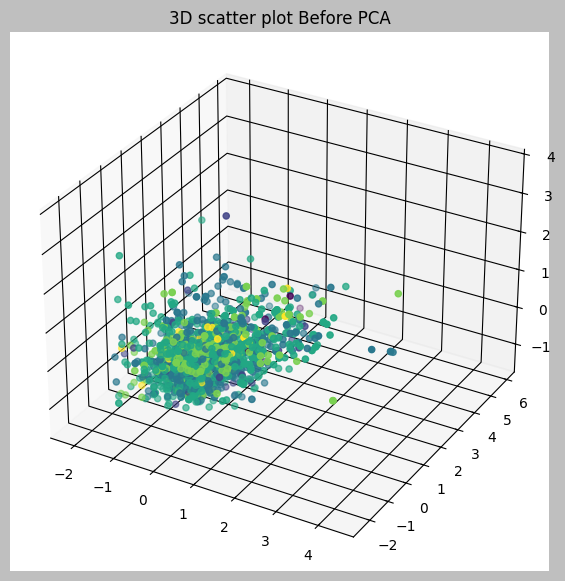

In [176]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter(scaled_data[:,0],scaled_data[:,1], scaled_data[:,2], c=y, cmap='viridis')
plt.title("3D scatter plot Before PCA")
plt.show()

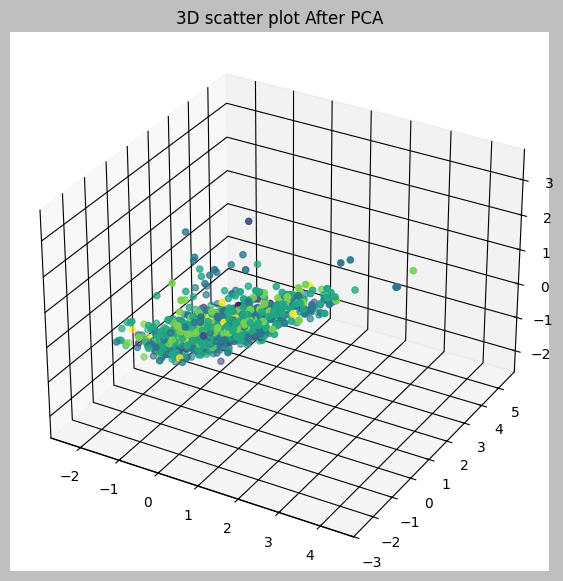

In [177]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter(LL[:,0],LL[:,1], LL[:,2], c=y, cmap='viridis')
plt.title("3D scatter plot After PCA")
plt.show()

Pada visualisasi di atas, kita melihat proyeksi tiga dimensi untuk scatter plot sebelum PCA (menggunakan data asli) dan setelah PCA (menggunakan PC1, PC2, PC3). Dapat kita lihat bahwa persebaran datanya mirip, namun masih terdapat beberapa perbedaan di antara keduanya, hal ini karena tiga principal component yang kita pilih tidak menangkap 100% variasi dataset.

Lebih lanjut, kita juga dapat melihat informasi dari mana nilai setiap fitur hasil PCA berasal pada *code cell* berikut. Dapat dilihat bahwa setiap PC merupakan kombinasi linear dari fitur-fitur semula. Sebagai contoh, PC1 dapat diperoleh dari `0.489314	* fixed acidity - 0.238584 * volatile acidity + 0.463632 * citric acid + 0.146107	* residual sugar + 0.212247 * chlorides - 0.036158 * free sulfur dioxide + 0.023575	* total sulfur dioxide + 0.395353 * density - 0.438520 * pH + 0.242921 * sulphates - 0.113232 * alcohol` dengan setiap koefisien menggambarkan kontribusi relatif dari setiap fitur terhadap PC1. Dengan begitu, kita dapat memilih untuk menghapus beberapa PC dengan *explained variance* terkecil tanpa kehilangan informasi yang signifikan.

In [51]:
pd.DataFrame(pca.components_, columns=X.columns, index=['PC' + str(i) for i in range (1, X.shape[1] + 1)])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
PC1,0.489314,-0.238584,0.463632,0.146107,0.212247,-0.036158,0.023575,0.395353,-0.438520,0.242921,-0.113232
PC2,-0.110503,0.274930,-0.151791,0.272080,0.148052,0.513567,0.569487,0.233575,0.006711,-0.037554,-0.386181
PC3,-0.123302,-0.449963,0.238247,0.101283,-0.092614,0.428793,0.322415,-0.338871,0.057697,0.279786,0.471673
PC4,-0.229617,0.078960,-0.079418,-0.372793,0.666195,-0.043538,-0.034577,-0.174500,-0.003788,0.550872,-0.122181
PC5,-0.082614,0.218735,-0.058573,0.732144,0.246501,-0.159152,-0.222465,0.157077,0.267530,0.225962,0.350681
PC6,-0.101479,-0.411449,-0.069593,-0.049156,-0.304339,0.014000,-0.136308,0.391152,0.522116,0.381263,-0.361645
PC7,0.350227,0.533735,-0.105497,-0.290663,-0.370413,0.116596,0.093662,0.170481,0.025138,0.447469,0.327651
PC8,0.177595,0.078775,0.377516,-0.299845,0.357009,0.204781,-0.019036,0.239223,0.561391,-0.374604,0.217626
PC9,0.194021,-0.129110,-0.381450,0.007523,0.111339,0.635405,-0.592116,0.020719,-0.167746,-0.058367,0.037603
PC10,-0.249523,0.365925,0.621677,0.092872,-0.217671,0.248483,-0.370750,-0.239990,-0.010970,0.112320,-0.303015


**Soal 8** : Lakukan PCA pada dataset [parkinson](https://www.kaggle.com/datasets/rohanpurohit03/parkinsons-disease-voice-and-clinical-data), tentukan berapa atribut yang digunakan dan jelaskan alasannya. Selanjutnya tampilkan visualisasi perbandingan dan berikan analisisnya dari 2 dimensi dengan explained variance tertinggi setelah mereduksi dimensi dengan PCA dengan sebelum dilakukan PCA.

In [178]:
# JANGAN UBAH KODE INI

from sklearn.decomposition import PCA

df = pd.read_csv('parkinson_final_cleaned.csv')

# Melihat shape dari dataframe
total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

# Melihat nama atribut dalam dataframe
print("-----Berikut adalah daftar kolom/attribut dalam dataset-----")
print()
print(df.columns)

Jumlah data: 23841
Jumlah atribut: 30
-----Berikut adalah daftar kolom/attribut dalam dataset-----

Index(['recording_id', 'fundamental_freq_hz', 'max_freq_hz', 'min_freq_hz',
       'jitter_percent', 'jitter_abs', 'jitter_rap', 'jitter_ppq',
       'jitter_ddp', 'shimmer', 'shimmer_db', 'shimmer_apq3', 'shimmer_apq5',
       'shimmer_apq', 'shimmer_dda', 'nhr', 'hnr', 'parkinson_status', 'rpde',
       'dfa', 'spread_1', 'spread_2', 'detrended_fluctuation', 'ppe',
       'subject_id', 'age', 'gender', 'test_time', 'motor_updrs_score',
       'total_updrs_score'],
      dtype='object')


In [97]:
# JANGAN UBAH KODE INI

X = df.select_dtypes(include=['float64'])
y = df['parkinson_status']

X.shape

(23841, 25)

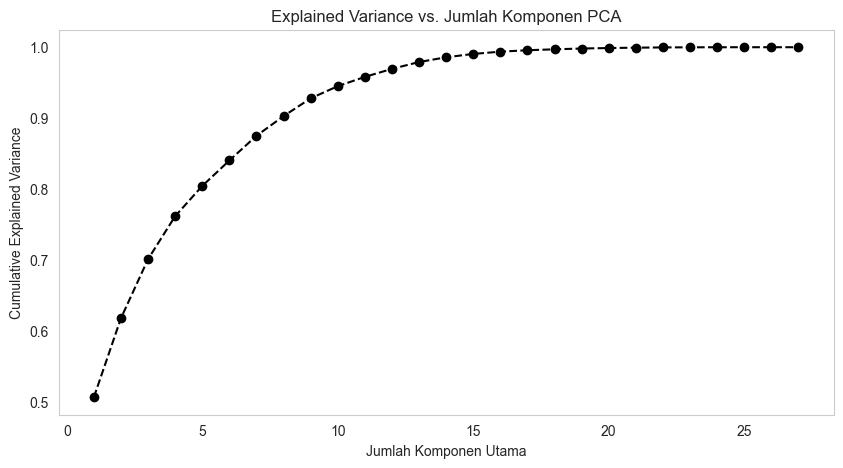

Jumlah komponen utama yang dipilih: 11


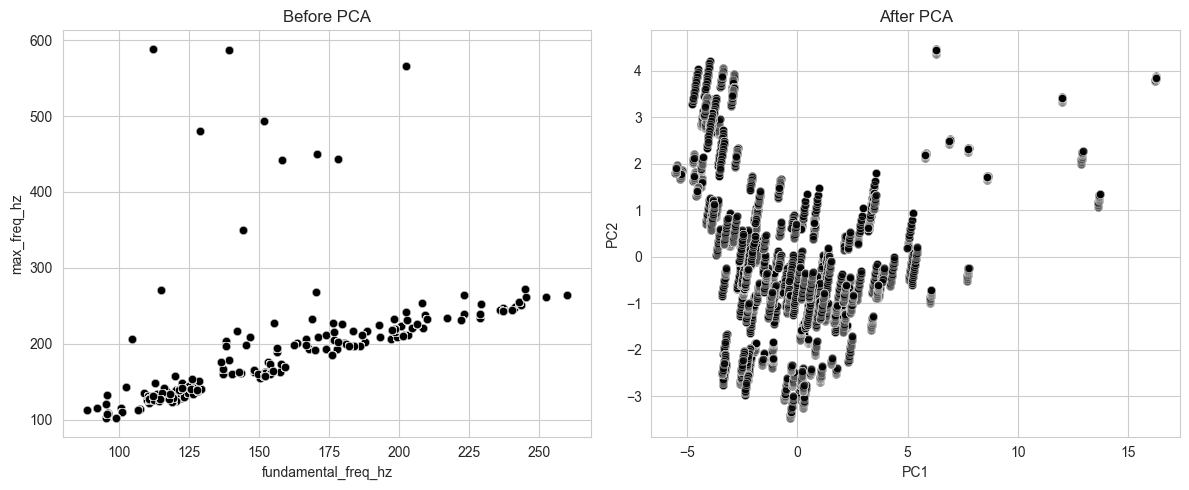

In [201]:
# 8 Jawab di sini
# Soal 8: Lakukan PCA pada dataset Parkinson, tentukan jumlah atribut optimal, dan tampilkan visualisasi Before & After PCA

# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Memuat dataset Parkinson
df_parkinson = pd.read_csv("parkinson_final_cleaned.csv")  # Sesuaikan path file jika berbeda

# Menghapus kolom non-numerik yang tidak diperlukan untuk PCA
df_parkinson_numeric = df_parkinson.drop(columns=['recording_id', 'gender', 'subject_id'])

# Standarisasi data sebelum PCA agar setiap fitur memiliki skala yang sama
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_parkinson_numeric)

# Melakukan PCA
pca = PCA()
pca.fit(df_scaled)

# Menentukan jumlah optimal komponen dengan explained variance ≥95%
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Jumlah Komponen Utama")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Jumlah Komponen PCA")
plt.grid()
plt.show()

# Menentukan jumlah komponen optimal
num_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Jumlah komponen utama yang dipilih: {num_components}")

# Melakukan PCA dengan jumlah komponen optimal
pca_final = PCA(n_components=num_components)
df_pca = pca_final.fit_transform(df_scaled)

# Visualisasi Before & After PCA dengan 2 dimensi explained variance tertinggi
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before PCA (menggunakan 2 fitur asli dari dataset)
sns.scatterplot(x=df_parkinson_numeric.iloc[:, 0], y=df_parkinson_numeric.iloc[:, 1], ax=axes[0], alpha=0.5)
axes[0].set_title("Before PCA")
axes[0].set_xlabel(df_parkinson_numeric.columns[0])
axes[0].set_ylabel(df_parkinson_numeric.columns[1])

# After PCA (menggunakan 2 Principal Components tertinggi)
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], ax=axes[1], alpha=0.5)
axes[1].set_title("After PCA")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

plt.tight_layout()
plt.show()


**Soal 9** : Kapan PCA perlu dilakukan? Apa step yang penting untuk dilakukan sebelum melakukan PCA secara manual maupun dengan library sklearn secara langsung dan apa alasannya?

**Hint**: Perhatikan persamaan preprocessing kedua tahap tersebut

**Jawab No 9:**
PCA perlu dilakukan ketika data memiliki dimensi tinggi dan terdapat korelasi antar fitur, sehingga ingin mereduksi dimensi tanpa kehilangan informasi penting. Sebelum melakukan PCA, langkah yang penting adalah standardisasi data untuk memastikan setiap fitur memiliki skala yang sama, menghindari dominasi fitur dengan varians besar. Tanpa standardisasi, PCA dapat memberikan hasil yang bias, karena komponen utama akan dipengaruhi oleh fitur dengan skala lebih besar. 